In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
BATCH_SIZE = 128
RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 24

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
186/211 [=========================>....] - ETA: 0s - loss: 2.9643 - accuracy: 0.0985
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 1s 2ms/step - loss: 2.9227 - accuracy: 0.1110 - val_loss: 2.3733 - val_accuracy: 0.4538
Epoch 2/1000
191/211 [==========================>...] - ETA: 0s - loss: 2.1048 - accuracy: 0.3256
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 2.0673 - accuracy: 0.3336 - val_loss: 1.2967 - val_accuracy: 0.7747
Epoch 3/1000
191/211 [==========================>...] - ETA: 0s - loss: 1.5610 - accuracy: 0.4456
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 1.5448 - accuracy: 0.4509 - val_loss: 0.9005 - val_accuracy: 0.8812
Epoch 4/1000
188/211 [=========================>....] - ETA: 0s - loss: 1.3279 - accu

Epoch 28/1000
204/211 [============================>.] - ETA: 0s - loss: 0.7219 - accuracy: 0.7389
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.7211 - accuracy: 0.7388 - val_loss: 0.2167 - val_accuracy: 0.9903
Epoch 29/1000
204/211 [============================>.] - ETA: 0s - loss: 0.7189 - accuracy: 0.7408
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.7189 - accuracy: 0.7401 - val_loss: 0.2200 - val_accuracy: 0.9592
Epoch 30/1000
204/211 [============================>.] - ETA: 0s - loss: 0.7046 - accuracy: 0.7400
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.7057 - accuracy: 0.7399 - val_loss: 0.2106 - val_accuracy: 0.9831
Epoch 31/1000
201/211 [===========================>..] - ETA: 0s - loss: 0.6956

Epoch 55/1000
203/211 [===========================>..] - ETA: 0s - loss: 0.6312 - accuracy: 0.7674
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.7671 - val_loss: 0.1616 - val_accuracy: 0.9943
Epoch 56/1000
204/211 [============================>.] - ETA: 0s - loss: 0.6289 - accuracy: 0.7698
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.7695 - val_loss: 0.1599 - val_accuracy: 0.9893
Epoch 57/1000
205/211 [============================>.] - ETA: 0s - loss: 0.6221 - accuracy: 0.7740
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.7748 - val_loss: 0.1519 - val_accuracy: 0.9772
Epoch 58/1000
191/211 [==========================>...] - ETA: 0s - loss: 0.6141

Epoch 82/1000
206/211 [============================>.] - ETA: 0s - loss: 0.5773 - accuracy: 0.7919
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.7916 - val_loss: 0.1403 - val_accuracy: 0.9897
Epoch 83/1000
205/211 [============================>.] - ETA: 0s - loss: 0.5742 - accuracy: 0.7915
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.7911 - val_loss: 0.1334 - val_accuracy: 0.9973
Epoch 84/1000
205/211 [============================>.] - ETA: 0s - loss: 0.5764 - accuracy: 0.7952
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7949 - val_loss: 0.1316 - val_accuracy: 0.9961
Epoch 85/1000
207/211 [============================>.] - ETA: 0s - loss: 0.5632

Epoch 109/1000
204/211 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.8050
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.8047 - val_loss: 0.1308 - val_accuracy: 0.9899
Epoch 110/1000
206/211 [============================>.] - ETA: 0s - loss: 0.5379 - accuracy: 0.8071
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.8072 - val_loss: 0.1237 - val_accuracy: 0.9940
Epoch 111/1000
203/211 [===========================>..] - ETA: 0s - loss: 0.5437 - accuracy: 0.8021
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.8019 - val_loss: 0.1117 - val_accuracy: 0.9952
Epoch 112/1000
201/211 [===========================>..] - ETA: 0s - loss:

211/211 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.8063 - val_loss: 0.1206 - val_accuracy: 0.9972
Epoch 136/1000
207/211 [============================>.] - ETA: 0s - loss: 0.5258 - accuracy: 0.8091
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.8080 - val_loss: 0.1184 - val_accuracy: 0.9914
Epoch 137/1000
207/211 [============================>.] - ETA: 0s - loss: 0.5220 - accuracy: 0.8102
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.8099 - val_loss: 0.1120 - val_accuracy: 0.9939
Epoch 138/1000
205/211 [============================>.] - ETA: 0s - loss: 0.5266 - accuracy: 0.8129
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.5267 - a

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

71/71 [==============================] - 0s 629us/step - loss: 0.1161 - accuracy: 0.9968


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 61ms/step
[1.3080918e-03 3.1645435e-08 2.6157382e-05 4.5158197e-07 8.1084127e-04
 9.6704223e-04 4.2910492e-10 2.6037763e-09 2.0219442e-04 6.3039192e-09
 9.9358058e-01 1.6142448e-12 1.9245310e-13 4.8542975e-06 1.4887569e-21
 6.0707044e-09 1.8395894e-14 7.7317981e-04 4.7197188e-15 1.9015180e-17
 1.8355033e-21 2.4593138e-15 2.2961579e-03 3.0395286e-05]
10


# Confusion matrix

282/282 [==============================] - 0s 515us/step


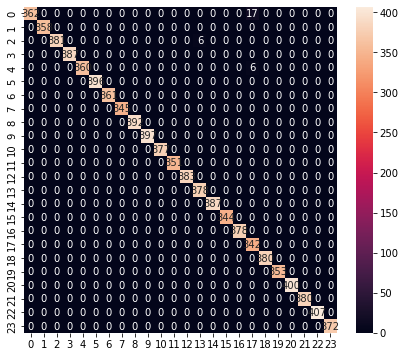

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       379
           1       1.00      1.00      1.00       358
           2       1.00      0.98      0.99       387
           3       1.00      1.00      1.00       387
           4       1.00      0.98      0.99       366
           5       1.00      1.00      1.00       396
           6       1.00      1.00      1.00       361
           7       1.00      1.00      1.00       345
           8       1.00      1.00      1.00       392
           9       1.00      1.00      1.00       397
          10       1.00      1.00      1.00       377
          11       1.00      1.00      1.00       351
          12       1.00      1.00      1.00       383
          13       0.98      1.00      0.99       378
          14       1.00      1.00      1.00       387
          15       1.00      1.00      1.00       344
          16       1.00      1.00      1.00       378
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mfaja\AppData\Local\Temp\tmprdv2ks5b\assets


7424

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3080895e-03 3.1645492e-08 2.6157404e-05 4.5158328e-07 8.1084005e-04
 9.6704176e-04 4.2910736e-10 2.6037861e-09 2.0219402e-04 6.3039303e-09
 9.9358058e-01 1.6142477e-12 1.9245272e-13 4.8542979e-06 1.4887681e-21
 6.0706924e-09 1.8396036e-14 7.7317824e-04 4.7197553e-15 1.9015398e-17
 1.8355101e-21 2.4593231e-15 2.2961621e-03 3.0395166e-05]
10
